In [1]:
#importing the important liberaries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [2]:
df=pd.read_csv("hydro.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the above dataset we can say that,
1. There are 908 rows and 25 columns.
2. The dataset can be observed from 2 point of views 1st one is when we have to predict capacity_mw which will act as dependent variable other will act as independent variable in this situation our model will be a regression model. 2nd when we have to predict primary fuel which will act as depenedent variable others will act as independent variable in this situation our model will be a classification model.
3. We can see that there are large amount of NAN values in our datasets.
4. There are too many features with categorial data.

In [3]:
df.shape

(908, 25)

This tell ue about the total number of rows and columns.

In [4]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

Name of each columns.

In [5]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

There are so many null values in each columns.

In [6]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

Tells us about the data type of each column.

In [7]:
df.info() # about the non null values of each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

# Univariant, Bivariant, Multivariant Analysis

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

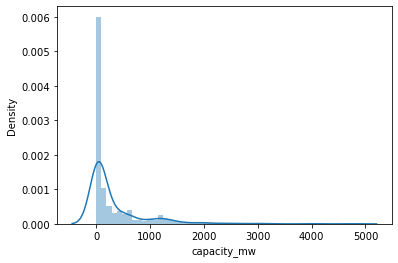

In [8]:
sns.distplot(df['capacity_mw'])

From the above distribution plot we can say that the curve is slightly right skewed.

<AxesSubplot:xlabel='latitude', ylabel='Density'>

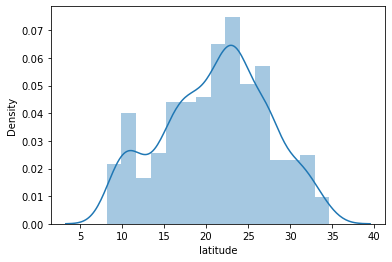

In [9]:
sns.distplot(df['latitude'])

latitude feature is normally distributed we can see no presence of outliers and the data the not skewed.

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

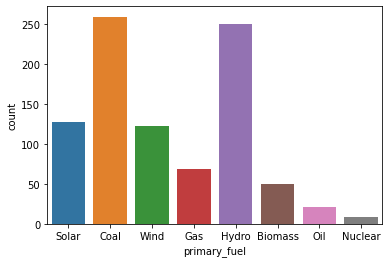

In [10]:
sns.countplot(df['primary_fuel'])

There are 8 different categories of primary fuel where coal and hydro are highest in number.

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='generation_gwh_2013'>

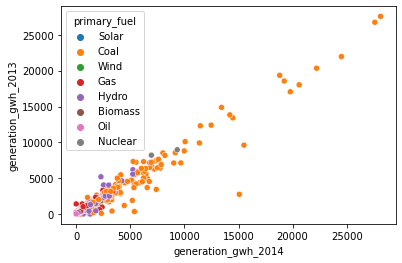

In [11]:
sns.scatterplot(data=df,y="generation_gwh_2013", x="generation_gwh_2014", hue='primary_fuel')

From above plot we can say that......gen_gwh_2013 and gen_gwh_2014 are positivley related to each other froming a linear relation.

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='generation_gwh_2015'>

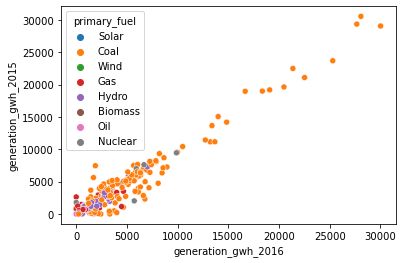

In [12]:
sns.scatterplot(data=df,y="generation_gwh_2015", x="generation_gwh_2016", hue='primary_fuel')

From above plot we can say that......gen_gwh_2015 and gen_gwh_2016 are positivley related to each other froming a linear relation.

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='generation_gwh_2017'>

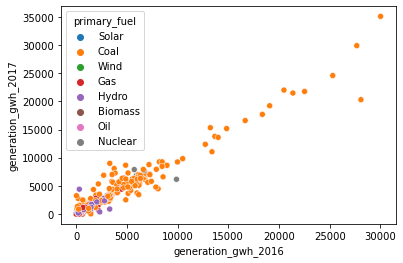

In [13]:
sns.scatterplot(data=df,y="generation_gwh_2017", x="generation_gwh_2016", hue='primary_fuel')

From above plot we can say that......gen_gwh_2016 and gen_gwh_2017 are positivley related to each other froming a linear relation.

capacity_mw                   AxesSubplot(0.125,0.787927;0.0824468x0.0920732)
latitude                    AxesSubplot(0.223936,0.787927;0.0824468x0.0920...
longitude                   AxesSubplot(0.322872,0.787927;0.0824468x0.0920...
other_fuel3                 AxesSubplot(0.421809,0.787927;0.0824468x0.0920...
commissioning_year          AxesSubplot(0.520745,0.787927;0.0824468x0.0920...
wepp_id                     AxesSubplot(0.619681,0.787927;0.0824468x0.0920...
year_of_capacity_data       AxesSubplot(0.718617,0.787927;0.0824468x0.0920...
generation_gwh_2013         AxesSubplot(0.817553,0.787927;0.0824468x0.0920...
generation_gwh_2014           AxesSubplot(0.125,0.677439;0.0824468x0.0920732)
generation_gwh_2015         AxesSubplot(0.223936,0.677439;0.0824468x0.0920...
generation_gwh_2016         AxesSubplot(0.322872,0.677439;0.0824468x0.0920...
generation_gwh_2017         AxesSubplot(0.421809,0.677439;0.0824468x0.0920...
estimated_generation_gwh    AxesSubplot(0.520745,0.677439;0.0824

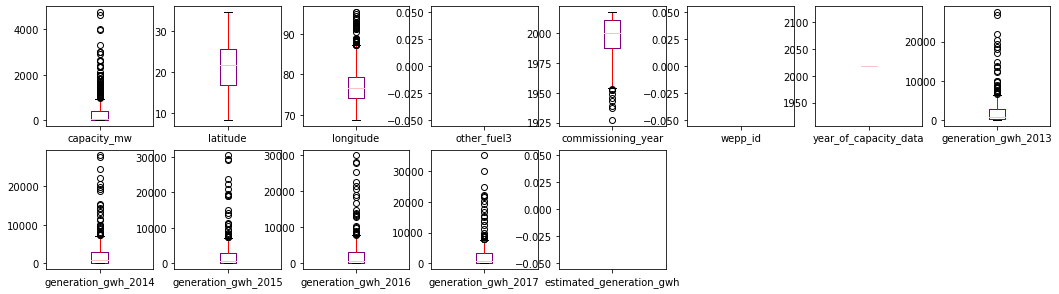

In [14]:
color=dict(boxes="Purple",whiskers="Red",medians="Pink",caps="Black")
df.plot(kind="box",subplots=True,layout=(7,8),figsize=(18,18),color=color)

From above we can see that there are outliers present in our dataset.

# Data Cleaning/Preprocessing

## Feature Engineering

In [15]:
df.drop(['country','country_long','name'],axis=1,inplace=True)
df.drop('url',axis=1,inplace=True)
df.drop(['other_fuel2','other_fuel3','wepp_id','estimated_generation_gwh'],axis=1,inplace=True)
df.drop(['commissioning_year','owner','source'],axis=1,inplace=True)
df.drop(['gppd_idnr'],axis=1,inplace=True)

In the above dataset we can see that some of the columns like country, name gppd_idnr, url, owner, source doesnt give us any relevant information that will help us in predicting the output variables and Variables like other fuel 2 and 3 where all the data is missing plays no role in predicting the output variable we can drop thoes columns. we will not be performing VIF factor calculation as we have already droped many columns droping furthur columns we may end up loosing important information.

In [16]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,2.5,28.1839,73.2407,Solar,NaN,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,WRI,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority
4,1800.0,21.9603,82.4091,Coal,Oil,WRI,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority


## Missing values

In [17]:
df.isnull().sum()

capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source    458
dtype: int64

We can see there are so much of data missing we may replace these data with mean and mode values as per the datatype of the feature.

In [18]:
df['latitude'].mean()  #replacing the missing values with mean

21.196188863109057

In [19]:
df['latitude'].fillna(21.196,inplace=True)

In [20]:
df['longitude'].mean()  #replacing the missing values with mean

77.44784779582372

In [21]:
df['longitude'].fillna(77.44,inplace=True)

In [22]:
df['other_fuel1'].value_counts()  #replacing the missing values with mode

Oil             196
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [23]:
df['other_fuel1'].fillna('Oil',inplace=True)

In [24]:
df['geolocation_source'].value_counts() #replacing the missing values with mode

WRI                                     766
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [25]:
df['geolocation_source'].fillna('WRI',inplace=True)

In [26]:
df.isnull().sum()

capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1                 0
geolocation_source          0
year_of_capacity_data     388
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source    458
dtype: int64

In [27]:
df['year_of_capacity_data'].value_counts()  #replacing the missing values with mode

2018.0    520
Name: year_of_capacity_data, dtype: int64

In [28]:
df['year_of_capacity_data'].fillna(2018,inplace=True)

In [29]:
df['generation_gwh_2013'].mean()  #replacing the missing values with mean

2304.0592017964586

In [30]:
df['generation_gwh_2013'].fillna(2304.059,inplace=True)  

In [31]:
df['generation_gwh_2014'].mean()  #replacing the missing values with mean

2420.3933164542264

In [32]:
df['generation_gwh_2014'].fillna(2420.393,inplace=True)

In [33]:
df['generation_gwh_2015'].mean()  #replacing the missing values with mean

2414.072373401681

In [34]:
df['generation_gwh_2015'].fillna(2414.072,inplace=True)

In [35]:
df['generation_gwh_2016'].mean()  #replacing the missing values with mean

2453.9362918708252

In [36]:
df['generation_gwh_2016'].fillna(2453.936,inplace=True)

In [37]:
df['generation_gwh_2017'].mean()  #replacing the missing values with mean

2531.7544577527983

In [38]:
df['generation_gwh_2017'].fillna(2531.7544,inplace=True)

In [39]:
df['generation_data_source'].value_counts()  #replacing the missing values with mode

Central Electricity Authority    450
Name: generation_data_source, dtype: int64

In [40]:
df['generation_data_source'].fillna("Central Electricity Authority",inplace=True)

In [41]:
df.isnull().sum()

capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_data_source    0
dtype: int64

No missing values in the dataset now.

## Label Encoding

In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
li=['primary_fuel','other_fuel1','geolocation_source','year_of_capacity_data','generation_data_source']
for val in li:
    df[val]=le.fit_transform(df[val].astype(str))


In [43]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,2.5,28.1839,73.2407,6,2,1,0,2304.059000,2420.393000,2414.072000,2453.936000,2531.754400,0
1,98.0,24.7663,74.6090,1,2,2,0,2304.059000,2420.393000,2414.072000,2453.936000,2531.754400,0
2,39.2,21.9038,69.3732,7,2,2,0,2304.059000,2420.393000,2414.072000,2453.936000,2531.754400,0
3,135.0,23.8712,91.3602,2,2,2,0,631.777928,617.789264,843.747000,886.004428,663.774500,0
4,1800.0,21.9603,82.4091,1,2,2,0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,1,2,2,0,2304.059000,2420.393000,0.994875,233.596650,865.400000,0
904,3.0,12.8932,78.1654,6,2,0,0,2304.059000,2420.393000,2414.072000,2453.936000,2531.754400,0
905,25.5,15.2758,75.5811,7,2,2,0,2304.059000,2420.393000,2414.072000,2453.936000,2531.754400,0
906,80.0,24.3500,73.7477,1,2,2,0,2304.059000,2420.393000,2414.072000,2453.936000,2531.754400,0


Coverting all the categorial data into the integer values.

<AxesSubplot:>

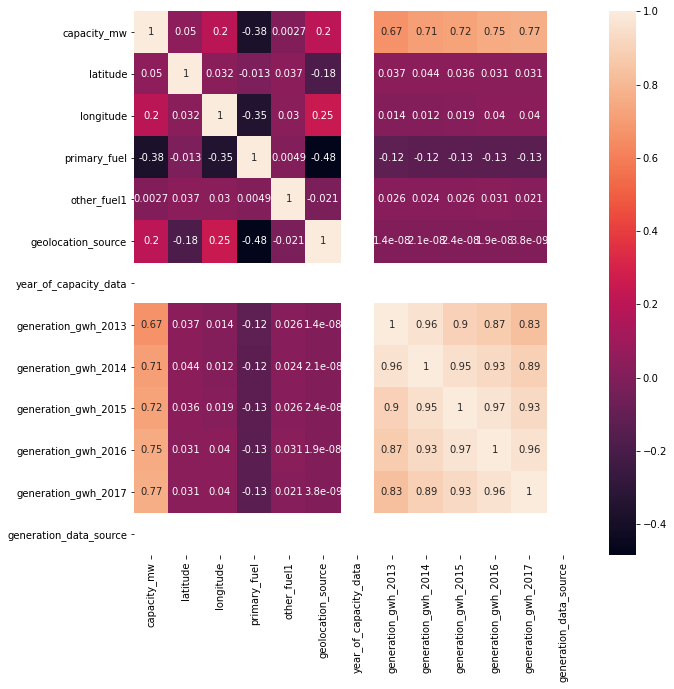

In [44]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

From the above heatmap,
1. gen_gwh_2014,15,16,17 are contributing positively in determining the capacity_mw.
2. gen_gwh_2014,15,16,17 are also positively corelated to each other.

In [45]:
df.describe()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.0,908.000000,908.000000,908.000000,908.000000,908.000000,908.0
mean,321.046378,21.196179,77.447450,3.205947,1.995595,1.733480,0.0,2304.059085,2420.393140,2414.072175,2453.936140,2531.754428,0.0
std,580.221767,6.088110,4.781201,2.281339,0.081214,0.676835,0.0,2465.930970,2665.360236,2860.146282,2878.730064,2923.041411,0.0
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,16.837500,17.057825,74.390250,1.000000,2.000000,2.000000,0.0,1332.538825,1175.264825,874.205000,826.629750,852.438887,0.0
50%,60.000000,21.278850,76.978950,3.000000,2.000000,2.000000,0.0,2304.059000,2420.393000,2414.072000,2453.936000,2531.754400,0.0
75%,388.125000,25.183775,79.211600,6.000000,2.000000,2.000000,0.0,2304.059000,2420.393000,2414.072000,2453.936000,2531.754400,0.0
max,4760.000000,34.649000,95.408000,7.000000,2.000000,2.000000,0.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,0.0


From the above plot we can say that, there is huge difference between 75% and max outliers could be there but as we have observed that there are lot of missing values in our dataset and removing the outliers could lead us to inaccurate results.

## Skewness and Outliers

In [46]:
df.skew()

capacity_mw                3.193257
latitude                  -0.147387
longitude                  1.130086
primary_fuel               0.471141
other_fuel1              -20.464435
geolocation_source        -2.161710
year_of_capacity_data      0.000000
generation_gwh_2013        5.241491
generation_gwh_2014        5.041961
generation_gwh_2015        5.367370
generation_gwh_2016        5.071758
generation_gwh_2017        5.111938
generation_data_source     0.000000
dtype: float64

skewness is present in our dataset that may be because of outliers and missing values we will use power transformation method like yeo-johnson to remove the skewness.

## Dividing the dataset into Independent(X) and Dependent(Y) variable when capacity is dependent variable.

In [47]:
x=df.iloc[:,1:-1]  #independent variables.
x

,latitude,longitude,primary_fuel,other_fuel1,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,28.1839,73.2407,6,2,1,0,2304.059000,2420.393000,2414.072000,2453.936000,2531.754400
1,24.7663,74.6090,1,2,2,0,2304.059000,2420.393000,2414.072000,2453.936000,2531.754400
2,21.9038,69.3732,7,2,2,0,2304.059000,2420.393000,2414.072000,2453.936000,2531.754400
3,23.8712,91.3602,2,2,2,0,631.777928,617.789264,843.747000,886.004428,663.774500
4,21.9603,82.4091,1,2,2,0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...
903,16.2949,77.3568,1,2,2,0,2304.059000,2420.393000,0.994875,233.596650,865.400000
904,12.8932,78.1654,6,2,0,0,2304.059000,2420.393000,2414.072000,2453.936000,2531.754400
905,15.2758,75.5811,7,2,2,0,2304.059000,2420.393000,2414.072000,2453.936000,2531.754400
906,24.3500,73.7477,1,2,2,0,2304.059000,2420.393000,2414.072000,2453.936000,2531.754400


In [48]:
y=df.iloc[:,0]  #dependent variable.
y

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
903    1600.0
904       3.0
905      25.5
906      80.0
907      16.5
Name: capacity_mw, Length: 908, dtype: float64

## Removing Skewness and Standard Scaling

In [49]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')  #removing skewness.
x


array([[ 1.15762116, -0.95313819,  1.17102468, ...,  0.31414137,
         0.31812954,  0.31588978],
       [ 0.57870047, -0.54498048, -0.99559029, ...,  0.31414137,
         0.31812954,  0.31588978],
       [ 0.10056497, -2.38054685,  1.44103901, ...,  0.31414137,
         0.31812954,  0.31588978],
       ...,
       [-0.97864485, -0.28028656,  1.44103901, ...,  0.31414137,
         0.31812954,  0.31588978],
       [ 0.5087646 , -0.79677568, -0.99559029, ...,  0.31414137,
         0.31812954,  0.31588978],
       [-1.81231366,  0.18267791,  1.44103901, ...,  0.31414137,
         0.31812954,  0.31588978]])

In [50]:
from sklearn.preprocessing import StandardScaler
mn=StandardScaler()  #bringing all the columns on the same scale.
x=mn.fit_transform(x)
x

array([[ 1.15762116, -0.95313848,  1.17102468, ...,  0.31414137,
         0.31812954,  0.31588978],
       [ 0.57870047, -0.54498077, -0.99559029, ...,  0.31414137,
         0.31812954,  0.31588978],
       [ 0.10056497, -2.38054713,  1.44103901, ...,  0.31414137,
         0.31812954,  0.31588978],
       ...,
       [-0.97864485, -0.28028684,  1.44103901, ...,  0.31414137,
         0.31812954,  0.31588978],
       [ 0.5087646 , -0.79677597, -0.99559029, ...,  0.31414137,
         0.31812954,  0.31588978],
       [-1.81231366,  0.18267763,  1.44103901, ...,  0.31414137,
         0.31812954,  0.31588978]])

## Performing Algorithms

In [51]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [52]:
minmse=0    #finding the best Random State
maxrs=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    err=mean_squared_error(y_test,pred)
    if err>minmse:
        minmse=err
        maxrs=i
print("MSE is ",round(minmse,2),"at random state",maxrs)

MSE is  300912.75 at random state 32


In [53]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,test_size=.30,random_state=32)

# Linear Regression

In [54]:
lr=LinearRegression()
lr.fit(x_train1,y_train1)
print("Cofficient is:",lr.coef_)
print("Intercept is: ",lr.intercept_)
sco=lr.score(x_train1,y_train1)
sco1=sco*100
print("Score is: ",sco1)
pred=lr.predict(x_test1)

Cofficient is: [ 3.08751245e+01  1.03137447e+02 -1.04874386e+02 -2.59727311e+01
  7.26898517e+01 -1.25055521e-12  3.69936757e+01  3.70382391e+00
 -4.08392924e+01  7.38175322e+01  2.27326310e+02]
Intercept is:  306.39368718153867
Score is:  43.97435067254326


In [55]:
mse=mean_squared_error(y_test1,pred)
print("Mean Squared Error is: ",round(mse,2))
abse=mean_absolute_error(y_test1,pred)
print("Mean Absolute Error is: ",round(abse,2))
scr=r2_score(y_test1,pred)
print("R2 Score is: ",round(scr,2))
print("rsme",np.sqrt(mse))


Mean Squared Error is:  300912.75
Mean Absolute Error is:  364.79
R2 Score is:  0.35
rsme 548.5551450907908


# Support Vector Regressor

In [56]:
svr1=SVR(kernel="linear")
svr1.fit(x_train1,y_train1)
sw2=svr1.score(x_train1,y_train1)
print("Coffecient is: ",svr1.coef_)
print("Intercept is: ",svr1.intercept_)
print("Score is: ",sw2)
pred=svr1.predict(x_test1)
print("Mean Squared Error is:",round(mean_squared_error(y_test1,pred),2))
print("Mean Absolute Error is:",round(mean_absolute_error(y_test1,pred),2))
print("R2 Score is:",round(r2_score(y_test1,pred),2))
print("RSME",np.sqrt(mean_squared_error(y_test1,pred)))

Coffecient is:  [[ 12.5825755   14.79018272 -56.92569481  -5.01232817  18.79539553
    0.          10.577466     9.40930597  -4.47568167   3.42445506
   14.96396757]]
Intercept is:  [121.81636283]
Score is:  0.03778522214325086
Mean Squared Error is: 478202.42
Mean Absolute Error is: 344.77
R2 Score is: -0.03
RSME 691.5218176442888


# Ridge Regression

In [57]:
lt1=Ridge(alpha=0.001) #choosing the best alpha
lt1.fit(x_train1,y_train1)
sw1=lt1.score(x_train1,y_train1)
print("Coffecient is: ",lt1.coef_)
print("Intercept is: ",lt1.intercept_)
print("Score is: ",sw1)
pred=lt1.predict(x_test1)
print("Mean Squared Error is:",round(mean_squared_error(y_test1,pred),2))
print("Mean Absolute Error is:",round(mean_absolute_error(y_test1,pred),2))
print("R2 Score is:",round(r2_score(y_test1,pred),2))
print("RSME",np.sqrt(mean_squared_error(y_test1,pred)))

Coffecient is:  [  30.87505173  103.13734409 -104.87433629  -25.97264259   72.68976568
    0.           36.9933107     3.70433551  -40.83819673   73.8181158
  227.32428205]
Intercept is:  306.39369366444265
Score is:  0.43974350672260154
Mean Squared Error is: 300912.6
Mean Absolute Error is: 364.79
R2 Score is: 0.35
RSME 548.5550124967824


# Lasso Regression

In [58]:
ls1=Lasso(alpha=0.001)   #choosing the best alpha
ls1.fit(x_train1,y_train1)
sw=ls1.score(x_train1,y_train1)
print("Coffecient is: ",ls1.coef_)
print("Intercept is: ",ls1.intercept_)
print("Score is: ",sw)
pred=ls1.predict(x_test1)
print("Mean Squared Error is:",round(mean_squared_error(y_test1,pred),2))
print("Mean Absolute Error is:",round(mean_absolute_error(y_test1,pred),2))
print("R2 Score is:",round(r2_score(y_test1,pred),2))
print("RSME",np.sqrt(mean_squared_error(y_test1,pred)))

Coffecient is:  [  30.87430034  103.1371742  -104.87429646  -25.97162164   72.68888205
    0.           36.99310703    3.69815142  -40.81943432   73.80069248
  227.32849775]
Intercept is:  306.3938416557772
Score is:  0.4397435065718155
Mean Squared Error is: 300911.81
Mean Absolute Error is: 364.79
R2 Score is: 0.35
RSME 548.5542902159658


# KNeighbors Regressor

In [59]:
knr=KNeighborsRegressor()
knr.fit(x_train1,y_train1)
sw=knr.score(x_train1,y_train1)
#print("Coffecient is: ",knr.coef_)
#print("Intercept is: ",knr.intercept_)
print("Score is: ",sw)
pred=knr.predict(x_test1)
print("Mean Squared Error is:",round(mean_squared_error(y_test1,pred),2))
print("Mean Absolute Error is:",round(mean_absolute_error(y_test1,pred),2))
print("R2 Score is:",round(r2_score(y_test1,pred),2))
print("RSME",np.sqrt(mean_squared_error(y_test1,pred)))

Score is:  0.8582621894758793
Mean Squared Error is: 121940.98
Mean Absolute Error is: 164.04
R2 Score is: 0.74
RSME 349.2004826104443


# Cross Validation Scores

In [60]:
def rmse_cv(model,x_train1,y_train1):
    mse_cv_score=-cross_val_score(model,x_train1,y_train1,cv=5,scoring="neg_mean_squared_error",n_jobs=-1)
    rmse_cv=np.sqrt(mse_cv_score).mean()
    return(rmse_cv)

In [61]:
rmse_cv(lr,x_train1,y_train1)

411.54226247318155

In [62]:
rmse_cv(svr1,x_train1,y_train1)

511.9028202652374

In [63]:
rmse_cv(lt1,x_train1,y_train1)

411.54193864114006

In [64]:
rmse_cv(ls1,x_train1,y_train1)

411.541289940532

In [65]:
rmse_cv(knr,x_train1,y_train1)

262.6966212990084

On comparing the RMSE of the above models with the cross validated RMSE of the models we can see that the RMSE is least in Kneighbors Regressor and the R2 score is also good as compared to other models. We will choose KNeighbors Regressor as the best model.

# Hyper Parameter Tuning using GridSearchCV

In [57]:
parameter={"weights":['uniform','distance'],
           "n_neighbors":np.arange(2,20),
          "algorithm":["auto","ball_tree","brute","kd_tree"],
          "leaf_size":np.arange(2,20)}

In [58]:
gcv=GridSearchCV(KNeighborsRegressor(),parameter,cv=5)

In [59]:
gcv.fit(x_train1,y_train1)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'brute', 'kd_tree'],
                         'leaf_size': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'weights': ['uniform', 'distance']})

In [60]:
gcv.best_params_ 

{'algorithm': 'ball_tree',
 'leaf_size': 2,
 'n_neighbors': 2,
 'weights': 'distance'}

# Final Model

In [66]:
knr=KNeighborsRegressor(algorithm='ball_tree',leaf_size=2,n_neighbors=2,weights='distance')
knr.fit(x_train1,y_train1)
sw=knr.score(x_train1,y_train1)
#print("Coffecient is: ",knr.coef_)
#print("Intercept is: ",knr.intercept_)
print("Score is: ",sw)
pred=knr.predict(x_test1)
print("Mean Squared Error is:",round(mean_squared_error(y_test1,pred),2))
print("Mean Absolute Error is:",round(mean_absolute_error(y_test1,pred),2))
print("R2 Score is:",round(r2_score(y_test1,pred),2))
print("RSME",np.sqrt(mean_squared_error(y_test1,pred)))

Score is:  0.999918126260051
Mean Squared Error is: 115591.88
Mean Absolute Error is: 167.37
R2 Score is: 0.75
RSME 339.98805495876485


# Saving the Model

In [67]:
import joblib
joblib.dump(knr,"globalpower3.pkl")

['globalpower3.pkl']

## Dividing the dataset into Independent(X) and Dependent(Y) Variable when Primary fuel is dependent variable.

In [55]:
x_new=df.drop('primary_fuel',axis=1) #independent variables
x_new

,capacity_mw,latitude,longitude,other_fuel1,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,2.5,28.1839,73.2407,2,1,0,2304.059000,2420.393000,2414.072000,2453.936000,2531.754400,0
1,98.0,24.7663,74.6090,2,2,0,2304.059000,2420.393000,2414.072000,2453.936000,2531.754400,0
2,39.2,21.9038,69.3732,2,2,0,2304.059000,2420.393000,2414.072000,2453.936000,2531.754400,0
3,135.0,23.8712,91.3602,2,2,0,631.777928,617.789264,843.747000,886.004428,663.774500,0
4,1800.0,21.9603,82.4091,2,2,0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,2,2,0,2304.059000,2420.393000,0.994875,233.596650,865.400000,0
904,3.0,12.8932,78.1654,2,0,0,2304.059000,2420.393000,2414.072000,2453.936000,2531.754400,0
905,25.5,15.2758,75.5811,2,2,0,2304.059000,2420.393000,2414.072000,2453.936000,2531.754400,0
906,80.0,24.3500,73.7477,2,2,0,2304.059000,2420.393000,2414.072000,2453.936000,2531.754400,0


In [56]:
y_new=df['primary_fuel']  #dependent variables.
y_new

0      6
1      1
2      7
3      2
4      1
      ..
903    1
904    6
905    7
906    1
907    7
Name: primary_fuel, Length: 908, dtype: int32

In [57]:
y_new.value_counts()

1    259
3    250
6    127
7    123
2     69
0     50
5     21
4      9
Name: primary_fuel, dtype: int64

## Removing Skewness and Standard Scaling

In [58]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x,method='yeo-johnson')   #removing the skewness.
x_new


array([[ 1.15762116, -0.95313819,  1.17102468, ...,  0.31414137,
         0.31812954,  0.31588978],
       [ 0.57870047, -0.54498048, -0.99559029, ...,  0.31414137,
         0.31812954,  0.31588978],
       [ 0.10056497, -2.38054685,  1.44103901, ...,  0.31414137,
         0.31812954,  0.31588978],
       ...,
       [-0.97864485, -0.28028656,  1.44103901, ...,  0.31414137,
         0.31812954,  0.31588978],
       [ 0.5087646 , -0.79677568, -0.99559029, ...,  0.31414137,
         0.31812954,  0.31588978],
       [-1.81231366,  0.18267791,  1.44103901, ...,  0.31414137,
         0.31812954,  0.31588978]])

In [59]:
from sklearn.preprocessing import StandardScaler  #bringing all the rows on the same scale.
mn=StandardScaler()
x_new=mn.fit_transform(x)
x_new

array([[ 1.14839767e+00, -8.80337123e-01,  1.22541756e+00, ...,
        -6.11406969e-08, -4.88230171e-08, -9.64484447e-09],
       [ 5.86731853e-01, -5.93996071e-01, -9.67485760e-01, ...,
        -6.11406969e-08, -4.88230171e-08, -9.64484447e-09],
       [ 1.16293997e-01, -1.68968012e+00,  1.66399822e+00, ...,
        -6.11406969e-08, -4.88230171e-08, -9.64484447e-09],
       ...,
       [-9.72985341e-01, -3.90566898e-01,  1.66399822e+00, ...,
        -6.11406969e-08, -4.88230171e-08, -9.64484447e-09],
       [ 5.18314986e-01, -7.74238378e-01, -9.67485760e-01, ...,
        -6.11406969e-08, -4.88230171e-08, -9.64484447e-09],
       [-1.85081827e+00,  6.14196216e-03,  1.66399822e+00, ...,
        -6.11406969e-08, -4.88230171e-08, -9.64484447e-09]])

# SMOTE

In [60]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()      #SMOTE to balance the target variable.
x_res,y_res=smt.fit_resample(x_new,y_new)

In [61]:
y_res.value_counts()

0    259
2    259
4    259
6    259
1    259
3    259
5    259
7    259
Name: primary_fuel, dtype: int64

# Performing Algorithms

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve,roc_auc_score
from scipy.stats import zscore
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

In [63]:
maxacc=0  #finding the best random state
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=.30,random_state=i)
    lm=LogisticRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxacc:
        maxacc=accu
        maxrs=i
print("best accuracy is",round(maxacc,2),"at random state",maxrs)

best accuracy is 0.96 at random state 115


In [65]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x_res,y_res,test_size=.30,random_state=115)

# Logistic Regression

In [507]:
lm=LogisticRegression()
lm.fit(x_train1,y_train1)
pred=lm.predict(x_test1)
az=accuracy_score(y_test1,pred)
print("accuracy score",round(az,2))
cl=classification_report(y_test1,pred)
print(cl)

accuracy score 0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       0.96      0.98      0.97        82
           2       0.97      0.96      0.97        79
           3       0.96      0.96      0.96        81
           4       0.95      0.96      0.96        81
           5       0.99      0.97      0.98        68
           6       1.00      0.99      0.99        74
           7       0.99      1.00      0.99        76

    accuracy                           0.98       622
   macro avg       0.98      0.98      0.98       622
weighted avg       0.98      0.98      0.98       622



# Support Vector Classifier

In [508]:
svc1=SVC(kernel="rbf",probability=True)
svc1.fit(x_train1,y_train1)
pred=svc1.predict(x_test1)
print("Accuracy score",round(accuracy_score(y_test1,pred),2))
print(classification_report(y_test1,pred))

Accuracy score 0.99
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      0.99      0.99        82
           2       1.00      1.00      1.00        79
           3       1.00      1.00      1.00        81
           4       0.98      1.00      0.99        81
           5       0.99      0.97      0.98        68
           6       1.00      0.99      0.99        74
           7       0.99      1.00      0.99        76

    accuracy                           0.99       622
   macro avg       0.99      0.99      0.99       622
weighted avg       0.99      0.99      0.99       622



# Decision Tree Classifier

In [509]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train1,y_train1)
pred=dtc.predict(x_test1)
az=accuracy_score(y_test1,pred)
print("accuracy score",az)
cl=classification_report(y_test1,pred)
print(cl)

accuracy score 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        82
           2       1.00      1.00      1.00        79
           3       1.00      1.00      1.00        81
           4       1.00      1.00      1.00        81
           5       1.00      1.00      1.00        68
           6       1.00      1.00      1.00        74
           7       1.00      1.00      1.00        76

    accuracy                           1.00       622
   macro avg       1.00      1.00      1.00       622
weighted avg       1.00      1.00      1.00       622



# Random Forest Classifier

In [67]:
rf=RandomForestClassifier()
rf.fit(x_train1,y_train1)
pred=rf.predict(x_test1)
az=accuracy_score(y_test1,pred)
print("accuracy score",round(az,2))
cl=classification_report(y_test1,pred)
print(cl)

accuracy score 0.99
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      0.99      0.99        84
           2       0.98      0.98      0.98        83
           3       0.96      0.99      0.98        81
           4       1.00      1.00      1.00        66
           5       1.00      0.99      0.99        77
           6       1.00      1.00      1.00        72
           7       1.00      1.00      1.00        76

    accuracy                           0.99       622
   macro avg       0.99      0.99      0.99       622
weighted avg       0.99      0.99      0.99       622



# Cross Validation Score

In [511]:
print(round(cross_val_score(lm,x_res,y_res,cv=3).mean(),2))

0.96


In [512]:
print(round(cross_val_score(svc1,x_res,y_res,cv=3).mean(),2))

0.99


In [513]:
print(round(cross_val_score(dtc,x_res,y_res,cv=3).mean(),2))

1.0


In [68]:
print(round(cross_val_score(rf,x_res,y_res,cv=3).mean(),2))

0.99


On comparing the Accuracy of the models with the cross validated scores of the models we can see that decision tree classifier and random forest classifier both are acting as the best model and we can choose any of them to predict our results. I will saving the model and predicting the results with random forest classifier.

# AUC_ROC CURVE

In [70]:
rf=RandomForestClassifier()
rf.fit(x_train1,y_train1)

RandomForestClassifier()

In [71]:
probas=rf.predict_proba(x_test1)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

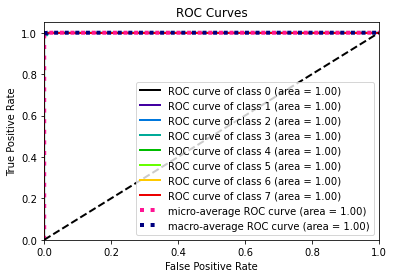

In [72]:
import scikitplot as skplt
skplt.metrics.plot_roc(y_test1,probas)

As we know that AUC_ROC curve is for binary classification here we are solving the multiclass classification problem we will use scikitplot library to plot our results where will be having different curves for each class. 

# Hyper Parameter Tuning using GridSearchCV

In [518]:
parameter={"criterion":['gini','entropy'],
           "max_depth":np.arange(2,20),
          "max_features":["auto","log2","sqrt"],
          "bootstrap":[True,False],
          "oob_score":[True,False]}

In [519]:
gcv=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [520]:
gcv.fit(x_train1,y_train1)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'oob_score': [True, False]})

In [521]:
gcv.best_params_ 

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 12,
 'max_features': 'sqrt',
 'oob_score': False}

# Final Model

In [522]:
final=RandomForestClassifier(criterion="entropy",max_depth=12,bootstrap=True,max_features="sqrt",oob_score=False)
final.fit(x_train1,y_train1)
pred=final.predict(x_test1)
print("Accuracy Score",accuracy_score(y_test1,pred))
print("Classification Report\n",classification_report(y_test1,pred))
print(confusion_matrix(y_test1,pred))

Accuracy Score 1.0
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        82
           2       1.00      1.00      1.00        79
           3       1.00      1.00      1.00        81
           4       1.00      1.00      1.00        81
           5       1.00      1.00      1.00        68
           6       1.00      1.00      1.00        74
           7       1.00      1.00      1.00        76

    accuracy                           1.00       622
   macro avg       1.00      1.00      1.00       622
weighted avg       1.00      1.00      1.00       622

[[81  0  0  0  0  0  0  0]
 [ 0 82  0  0  0  0  0  0]
 [ 0  0 79  0  0  0  0  0]
 [ 0  0  0 81  0  0  0  0]
 [ 0  0  0  0 81  0  0  0]
 [ 0  0  0  0  0 68  0  0]
 [ 0  0  0  0  0  0 74  0]
 [ 0  0  0  0  0  0  0 76]]


# Saving the Model

In [523]:
import joblib
joblib.dump(final,"globalpower.pkl")

['globalpower.pkl']